# Lets Grow More


# Task 1 (Beginner Level Task)

In [2]:
import pandas as pd

In [3]:
iris_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [4]:
iris_df.head()
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']


In [5]:
iris_df.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  149 non-null    float64
 1   Sepal_Width   149 non-null    float64
 2   Petal_Length  149 non-null    float64
 3   Petal_Width   149 non-null    float64
 4   Class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris_df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


    Observation: No anamoly observed. Data seems fine.

In [8]:
#Cloning the dataset to avoid data tampering
iris = iris_df
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
class_distribution = iris.groupby(by='Class').size()
print(class_distribution)

Class
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Data Visualisation

In [10]:
import matplotlib.pyplot as plt

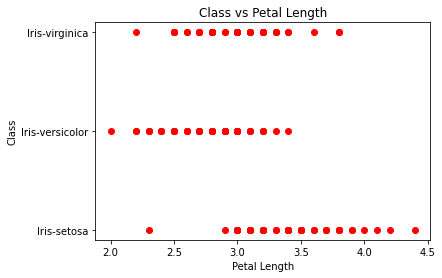

In [11]:
plt.scatter(x = 'Sepal_Width', y='Class', data = iris,color='red')
plt.xlabel("Petal Length")
plt.ylabel("Class")
plt.title("Class vs Petal Length")
plt.show()

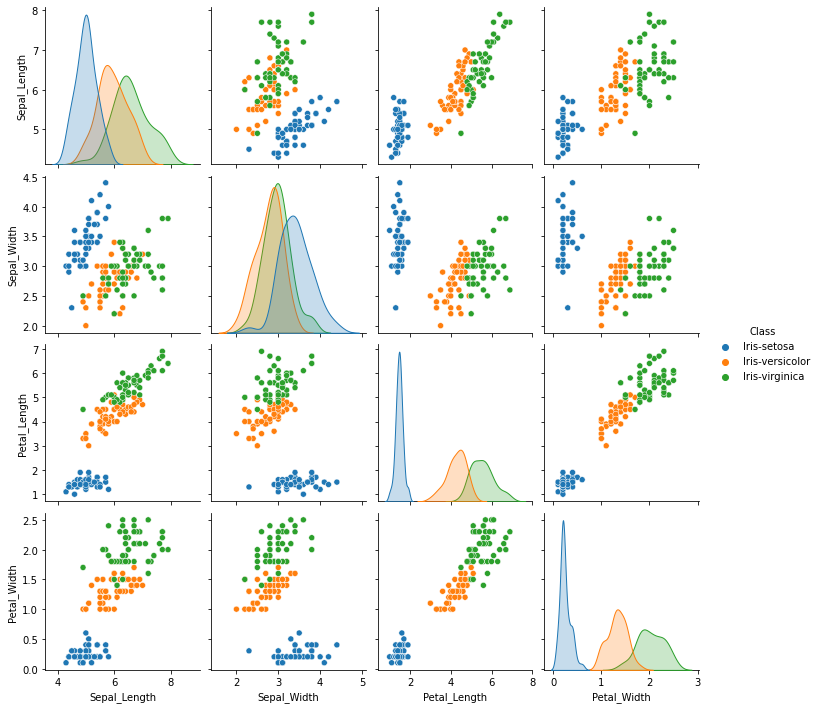

In [12]:
import seaborn as sns
sns.pairplot(iris , hue = 'Class')
plt.show()

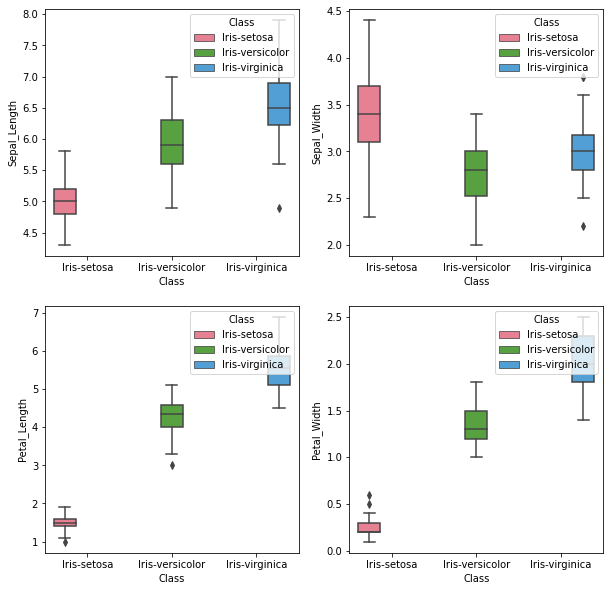

In [13]:
cols = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

for col, subplot in zip(cols, ax.flatten()):
    sns.boxplot(data = iris, x = 'Class', y = col, hue = 'Class', ax = subplot, palette = 'husl' )
    subplot.legend(loc = 'upper right', title = 'Class')
    
plt.show()


# Splitting data into Train and Test to feed the Model 

In [14]:
y = iris.Class #storing target column
iris.drop(['Class'], axis = 1, inplace=True) #dropping extra column


In [15]:
import numpy as np
X = np.asarray(iris)
Y = np.asarray(y)


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f'Shape of x_train: {x_train.shape} \nShape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape} \nShape of y_test: {y_test.shape}')

Shape of x_train: (119, 4) 
Shape of y_train: (119,)
Shape of x_test: (30, 4) 
Shape of y_test: (30,)


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)
prediction1 = model1.predict(x_test)
test_accuracy = accuracy_score(y_test, prediction1)
print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, model1.predict(x_train))}")
print(f"Test Accuracy of Logistic Regression is {test_accuracy}")

Training Accuracy of Logistic Regression is 1.0
Test Accuracy of Logistic Regression is 0.9


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
cm = confusion_matrix(y_test,prediction1)
print("Confusion Matrix \n", cm)
print("\nClassification Report \n", classification_report(y_test, prediction1))

Confusion Matrix 
 [[10  0  0]
 [ 0  0  9]
 [ 0  0 11]]

Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.00      0.00      0.00         9
 Iris-virginica       0.55      1.00      0.71        11

       accuracy                           0.70        30
      macro avg       0.52      0.67      0.57        30
   weighted avg       0.54      0.70      0.59        30



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classfier

In [19]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as Tree

In [20]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
tree.fit(x_train,y_train)
prediction2 = tree.predict(x_test)
test_accuracy2 = accuracy_score(y_test, prediction2)
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, tree.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {test_accuracy2}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9


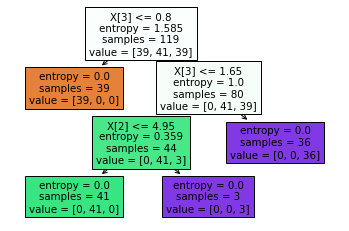

In [21]:
Tree.plot_tree(tree, filled=True)
plt.show()

# K Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [23]:
Ks = 15
mean_acc = np.zeros(Ks-1)
std_acc = np.zeros(Ks-1)
for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    knn_predict = knn.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test, knn_predict)
    std_acc[n-1] = np.std(knn_predict == y_test)/np.sqrt(knn_predict.shape[0])
print(mean_acc)

[0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.96666667 0.93333333 0.96666667 0.93333333 0.93333333
 0.9        0.93333333]


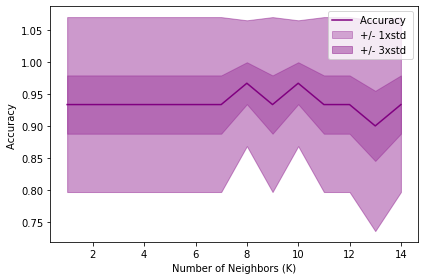

In [24]:
plt.plot(range(1,Ks), mean_acc, color = 'purple')
plt.fill_between(range(1,Ks),mean_acc-std_acc,mean_acc+std_acc ,alpha=0.30, color='purple')
plt.fill_between(range(1,Ks),mean_acc- 3*std_acc , mean_acc+ 3*std_acc ,alpha=0.40,color='purple')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

It can be seen that the accuracy is best for k = 8

In [27]:
k = 8
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
knn_predict = knn.predict(x_test)
mean_acc= accuracy_score(y_test, knn_predict)
std_acc = np.std(knn_predict == y_test)/np.sqrt(knn_predict.shape[0])
print(f"\nMean Accuracy = {mean_acc}\nStd Accuracy = {std_acc}")


Mean Accuracy = 0.9666666666666667
Std Accuracy = 0.03277306934167249


In [26]:
print("\nClassification Report \n", classification_report(y_test, prediction1))


Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.00      0.00      0.00         9
 Iris-virginica       0.55      1.00      0.71        11

       accuracy                           0.70        30
      macro avg       0.52      0.67      0.57        30
   weighted avg       0.54      0.70      0.59        30



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import tensorflow as tf

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle